### Import Functions

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

### Defining Parameters for Pollutant v Ecosystem Component Relationships 

Define Interaction Strengths

In [229]:
st = { 
    'xμC': 3,
    'xrM': 3,
    'xrT': 3,
    
    'xαCT': 3,
    'xαMT': 3,

    'xhB': 3,
    'xhG': 3,
    'xhS': 3,

    'xeB': 3,
    'xeG': 3,
    'xeS': 3
}

xμC, xrM, xrT, xαCT, xαMT = st['xμC'], st['xrM'], st['xrT'], st['xαCT'], st['xαMT']
xhB, xhG, xhS, xeB, xeG, xeS = st['xhB'], st['xhG'], st['xhS'], st['xeB'], st['xeG'], st['xeS']

Define Ecosystem Component Mins/Maxs

In [230]:
mm = {

    'μC_min': 0.02,
    'μC_max':  0.1,

    'rM_min': 0.05,
    'rM_max': 0.4,

    'rT_min': 2,
    'rT_max': 20,


    'αCT_min': 0,
    'αCT_max': 1,
    
    'αMT_min': 0,
    'αMT_max': 1,   


    'hB_min': 0,
    'hB_max': 1,

    'hG_min': 0,
    'hG_max': 1,

    'hS_min': 0,
    'hS_max': 1,

    'eB_min': 0,
    'eB_max': 0.9,

    'eG_min': 0,
    'eG_max': 0.9,

    'eS_min': 0,
    'eS_max': 0.9
}

μC_min, μC_max, rM_min, rM_max, rT_min, rT_max = mm['μC_min'], mm['μC_max'], mm['rM_min'], mm['rM_max'], mm['rT_min'], mm['rT_max']
αCT_min, αCT_max, αMT_min, αMT_max = mm['αCT_min'], mm['αCT_max'], mm['αMT_min'], mm['αMT_max']

hB_min, hB_max, hG_min, hG_max, hS_min, hS_max = mm['hB_min'], mm['hB_max'], mm['hG_min'], mm['hG_max'], mm['hS_min'], mm['hS_max']
eB_min, eB_max, eG_min, eG_max, eS_min, eS_max = mm['eB_min'], mm['eB_max'], mm['eG_min'], mm['eG_max'], mm['eS_min'], mm['eS_max']


### Generating Dataframes of Pollutant v Ecosystem Component Relationships 

Benthos

In [231]:
def bentho_eco(xμC, xrM, xrT, xαCT, xαMT,
              μC_min, μC_max, rM_min,
              rM_max, rT_min, rT_max,
              αCT_min, αCT_max, αMT_min, αMT_max):

    
    μC_values = []
    rM_values = []
    rT_values = []
    αCT_values = []
    αMT_values = []
    
    xμC = xμC
    xrM = xrM
    xrT = xrT
    xαCT = xαCT
    xαMT = xαMT
    
    nutr_value = np.linspace(0, 100, 101)
    nutr_max = 100

    sed_value = np.linspace(0, 100, 101)
    sed_max = 100

    
    for sed in sed_value:
        
        for nutr in nutr_value:

            
            # Sediment v. Coral Mortality Rate Association
            μC_min = μC_min
            μC_max = μC_max
            μC = μC_max + (μC_min - μC_max)*(((sed_max-sed)/100)**xμC)
            
            # Nutrient v. Macroalgae Growth Rate Association
            rM_min = rM_min
            rM_max = rM_max
            rM = rM_max + (rM_min - rM_max)*(((nutr_max-nutr)/100)**xrM)
            
            # Nutrient v. Turf Algae Growth Rate Association
            rT_min = rT_min
            rT_max = rT_max
            rT = rT_max + (rT_min - rT_max)*(((nutr_max-nutr)/100)**xrT)

            # Sediment v. Coral Overgrowth of Turf Association
            αCT_min = αCT_min
            αCT_max = αCT_max
            αCT = αCT_min + (αCT_max - αCT_min)*(((sed_max-sed)/100)**xαCT)

            # Sediment v. Macroalgae Overgrowth of Turf Association
            αMT_min = αMT_min
            αMT_max = αMT_max
            αMT = αMT_min + (αMT_max - αMT_min)*(((sed_max-sed)/100)**xαMT)
   
                
            μC_values.append((sed, nutr, μC))
            rM_values.append((sed, nutr, rM))
            rT_values.append((sed, nutr, rT))
            αCT_values.append((sed, nutr, αCT))
            αMT_values.append((sed, nutr, αMT))

            
    
    μC_values = pd.DataFrame(μC_values, columns=['sed', 'nutr', 'μC'])
    rM_values = pd.DataFrame(rM_values, columns=['sed', 'nutr', 'rM'])
    rT_values = pd.DataFrame(rT_values, columns=['sed', 'nutr', 'rT'])
    αCT_values = pd.DataFrame(αCT_values, columns=['sed', 'nutr', 'αCT'])
    αMT_values = pd.DataFrame(αMT_values, columns=['sed', 'nutr', 'αMT'])
    

    μC_values.to_pickle(f"μC_strength{xμC}")
    rM_values.to_pickle(f"rM_strength{xrM}")
    rT_values.to_pickle(f"rT_strength{xrT}")
    αCT_values.to_pickle(f"αCT_strength{xαCT}")
    αMT_values.to_pickle(f"αMT_strength{xαMT}")


bentho_eco(xμC, xrM, xrT, xαCT, xαMT, μC_min, μC_max, rM_min, rM_max, rT_min, rT_max, αCT_min, αCT_max, αMT_min, αMT_max)

In [232]:
base_path = (
    "C:/Users/gails/Desktop/Team Sediment/"
    "Chapter 1 - Theory/Current Analyses/"
    "Adding Nutrient & Sediment Associations/"
)

μC_strength = pd.read_pickle(f"{base_path}μC_strength{xμC}")
rM_strength = pd.read_pickle(f"{base_path}rM_strength{xrM}")
rT_strength = pd.read_pickle(f"{base_path}rT_strength{xrT}")

αCT_strength = pd.read_pickle(f"{base_path}αCT_strength{xαCT}")
αMT_strength = pd.read_pickle(f"{base_path}αMT_strength{xαMT}")

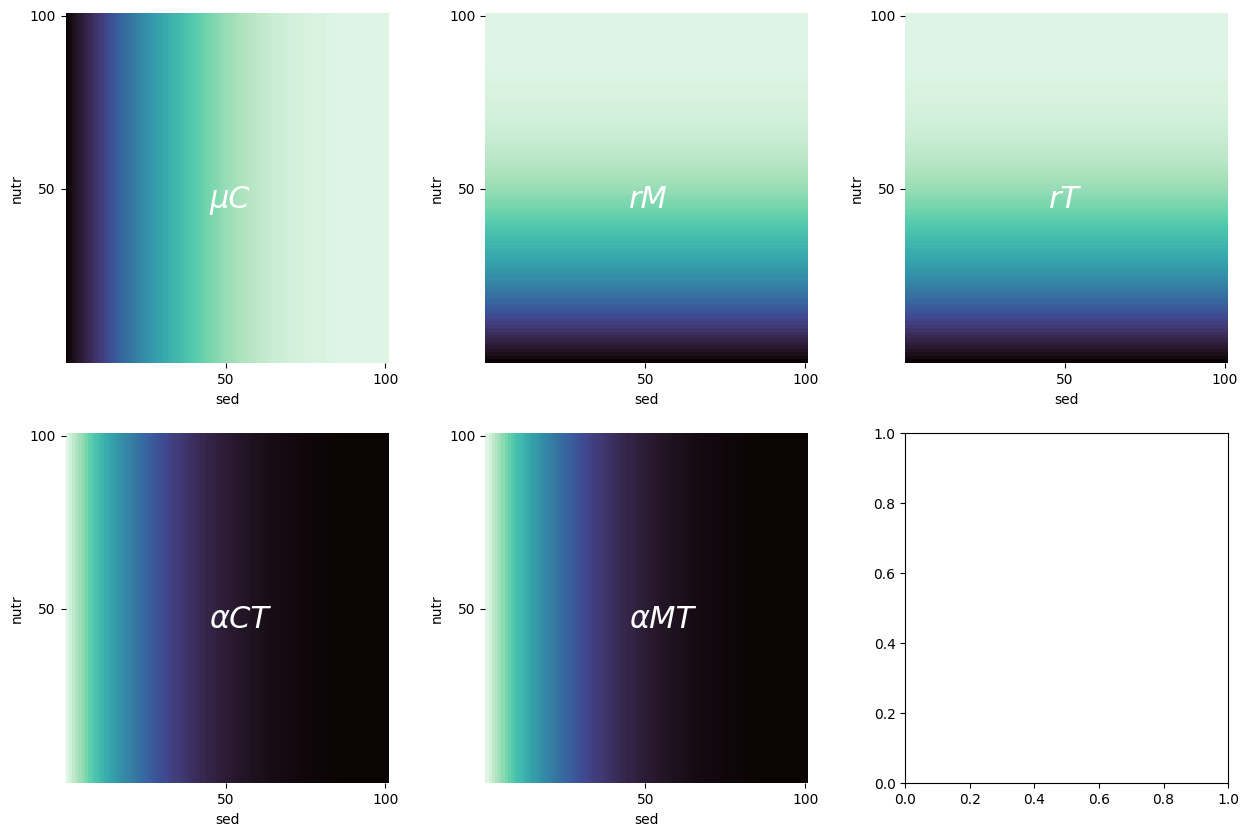

In [233]:
fig, axes = plt.subplots(
    2, 3, figsize=(15, 10),
    gridspec_kw={"wspace": 0.3})

plot_heatmap(μC_strength, "μC", axes[0,0], μC_min, μC_max)
plot_heatmap(rM_strength, "rM", axes[0,1], rM_min, rM_max)
plot_heatmap(rT_strength, "rT", axes[0,2], rT_min, rT_max)

plot_heatmap(αCT_strength, "αCT", axes[1,0], αCT_min, αCT_max)
plot_heatmap(αMT_strength, "αMT", axes[1,1], αMT_min, αMT_max)

Herbivores

In [234]:
def herb_eco(xhB, xhG, xhS, xeB, xeG, xeS,
            hB_min, hB_max, hG_min, hG_max,
            hS_min, hS_max, eB_min, eB_max,
            eG_min, eG_max, eS_min, eS_max):

    
    hB_values = []
    hG_values = []
    hS_values = []
    
    eB_values = []
    eG_values = []
    eS_values = []

    
    xhB = xhB
    xhG = xhG
    xhS = xhS
    xeB = xeB
    xeG = xeG
    xeS = xeS

    
    nutr_value = np.linspace(0, 100, 101)
    nutr_max = 100

    sed_value = np.linspace(0, 100, 101)
    sed_max = 100

    
    for sed in sed_value:
        
        for nutr in nutr_value:

            
            #Sediment v. Herbivory Rate Association
            hB_min = hB_min
            hB_max = hB_max
            hB = hB_min + (hB_max - hB_min)*(((sed_max-sed)/100)**xhB)

            hG_min = hG_min
            hG_max = hG_max
            hG = hG_min + (hG_max - hG_min)*(((sed_max-sed)/100)**xhG)

            hS_min = hS_min
            hS_max = hS_max
            hS = hS_min + (hS_max - hS_min)*(((sed_max-sed)/100)**xhS)

            
            #Sediment v. Emigration Rate Association
            eB_min = eB_min
            eB_max = eB_max
            eB = eB_max + (eB_min - eB_max)*(((sed_max-sed)/100)**xeB)
            
            eG_min = eG_min
            eG_max = eG_max
            eG = eG_max + (eG_min - eG_max)*(((sed_max-sed)/100)**xeG)
            
            eS_min = eS_min
            eS_max = eS_max
            eS = eS_max + (eS_min - eS_max)*(((sed_max-sed)/100)**xeS)

            
            hB_values.append((sed, nutr, hB))
            hG_values.append((sed, nutr, hG))
            hS_values.append((sed, nutr, hS))
            
            eB_values.append((sed, nutr, eB))
            eG_values.append((sed, nutr, eG))
            eS_values.append((sed, nutr, eS))

    
    hB_values = pd.DataFrame(hB_values, columns=['sed', 'nutr', 'hB'])
    hG_values = pd.DataFrame(hG_values, columns=['sed', 'nutr', 'hG'])
    hS_values = pd.DataFrame(hS_values, columns=['sed', 'nutr', 'hS'])

    eB_values = pd.DataFrame(eB_values, columns=['sed', 'nutr', 'eB'])
    eG_values = pd.DataFrame(eG_values, columns=['sed', 'nutr', 'eG'])
    eS_values = pd.DataFrame(eS_values, columns=['sed', 'nutr', 'eS'])


    hB_values.to_pickle(f"hB_strength{xhB}")
    hG_values.to_pickle(f"hG_strength{xhG}")
    hS_values.to_pickle(f"hS_strength{xhS}")
    
    eB_values.to_pickle(f"eB_strength{xeB}")
    eG_values.to_pickle(f"eG_strength{xeG}")
    eS_values.to_pickle(f"eS_strength{xeS}")


herb_eco(xhB, xhG, xhS, xeB, xeG, xeS, hB_min, hB_max, hG_min, hG_max,
        hS_min, hS_max, eB_min, eB_max, eG_min, eG_max, eS_min, eS_max)

In [235]:
base_path = (
    "C:/Users/gails/Desktop/Team Sediment/"
    "Chapter 1 - Theory/Current Analyses/"
    "Adding Nutrient & Sediment Associations/"
)

hB_strength = pd.read_pickle(f"{base_path}hB_strength{xhB}")
hG_strength = pd.read_pickle(f"{base_path}hG_strength{xhG}")
hS_strength = pd.read_pickle(f"{base_path}hS_strength{xhS}")

eB_strength = pd.read_pickle(f"{base_path}eB_strength{xeB}")
eG_strength = pd.read_pickle(f"{base_path}eG_strength{xeG}")
eS_strength = pd.read_pickle(f"{base_path}eS_strength{xeS}")


In [236]:
def plot_heatmap(df, value_col, ax, vmin, vmax):
    heatmap_df = df.pivot(index="nutr", columns="sed", values=value_col)

    hm = sns.heatmap(
        heatmap_df,
        ax=ax,
        cmap="mako",
        vmin=vmin,
        vmax=vmax,
        cbar=False
    )

    ax.set_xticks([50, 100])
    ax.set_yticks([50, 100])

    ax.set_xticklabels(['50', '100'])
    ax.set_yticklabels(['50', '100'])

    ax.set_xticklabels(hm.get_xmajorticklabels(), fontsize=10, rotation=0)
    ax.set_yticklabels(hm.get_ymajorticklabels(), fontsize=10, rotation=0)

    ax.set_ylim(ax.get_ylim()[::-1])

    ax.annotate(value_col, xy=(45, 45), color = 'white', fontsize=22, style='italic')

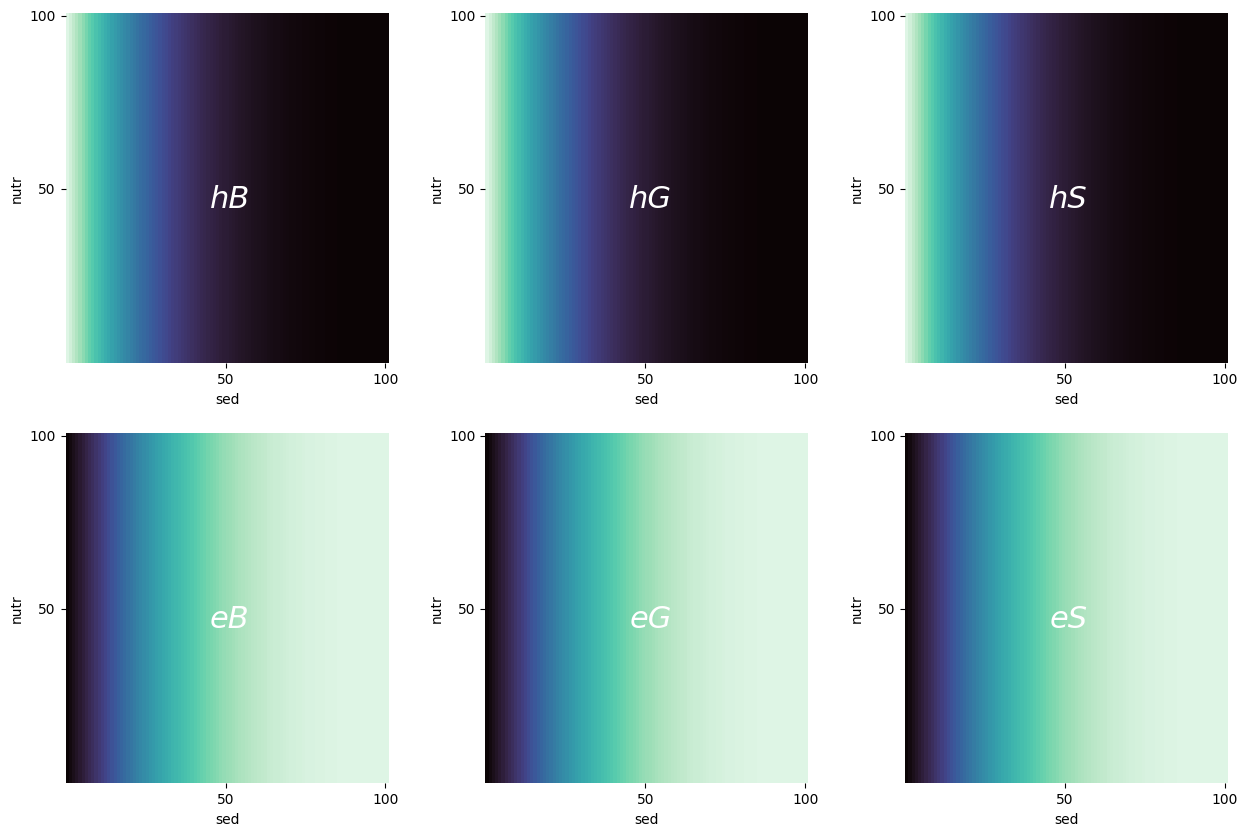

In [237]:
fig, axes = plt.subplots(
    2, 3, figsize=(15, 10),
    gridspec_kw={"wspace": 0.3})


plot_heatmap(hB_strength, "hB", axes[0, 0], hB_min, hB_max)
plot_heatmap(hG_strength, "hG", axes[0, 1], hG_min, hG_max)
plot_heatmap(hS_strength, "hS", axes[0, 2], hS_min, hS_max)

plot_heatmap(eB_strength, "eB", axes[1, 0], eB_min, eB_max)
plot_heatmap(eG_strength, "eG", axes[1, 1], eG_min, eG_max)
plot_heatmap(eS_strength, "eS", axes[1, 2], eS_min, eS_max)